In [1]:
# Importación de librerias necesarias para la transformacion y limpieza de datos
# ---------------------------------------------------------------------------------
# Tratamiento de datos
import pandas as pd
import numpy as np

#Gestion de archivos y rutas
import os
import sys

# Visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Configuracion de Pandas y eliminacion de warnings
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas en los DataFrames
import warnings
warnings.filterwarnings("ignore")  # Ocultar warnings innecesarios

# Funciones de extraccion y exploracion de datos
# Obtener la ruta del directorio raiz del proyecto
ruta_proyecto = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Agregar src/ al path si no esta ya incluido
if ruta_proyecto not in sys.path:
    sys.path.append(ruta_proyecto)
    
# Importar modulos de src   
from src import eda
from src import variables as va

In [2]:
# Importacion datos
df = eda.extraer_datos_csv("../datos/bruto/Bank_Customer_Churn_Prediction.csv")

✅ Datos extraidos correctamente. Filas: 10000, Columnas: 12


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Renombrar columnas 
df.rename(columns=va.columnas_renombradas, inplace=True)
display(df.head())

,id_cliente,puntacion_credito,pais,genero,edad,antiguedad,saldo,num_productos,tarjeta_credito,miembro_activo,salario_estimado,abandono
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Transformación binaria
def transformar_binarios(df, columnas):
    """
    Convierte valores binarios (1 y 0) a 'Si' y 'No' respectivamente en las columnas especificadas.

    Parametros:
        df (pd.DataFrame): DataFrame con los datos.
        columnas (list): Lista de columnas a transformar.

    Retorna:
        pd.DataFrame: DataFrame con valores transformados.
    """
    for col in columnas:
        # Verificar si la columna tiene valores binarios antes de aplicar la transformacion
        if df[col].isin([0, 1]).all():
            df[col] = df[col].map(va.mapeo_binario)
    return df

In [15]:
def generar_boxplots(df):
    """
    Genera boxplots para las variables numericas definidas en variables.py en una sola fila con separacion.

    Parametros:
        df (pd.DataFrame): DataFrame con los datos.

    Retorna:
        None: Muestra los boxplots de las variables numericas en un formato alineado.
    """
    fig, axes = plt.subplots(nrows=1, ncols=len(va.variables_numericas), figsize=(20, 5))  # 1 fila, 4 columnas

    # Generar cada boxplot
    for i, col in enumerate(va.variables_numericas):
        sns.boxplot(y=df[col], color="turquoise", ax=axes[i])
        axes[i].set_title(f"Boxplot de {col}")

    plt.subplots_adjust(wspace=0.4)  # Aumentar espacio entre graficas
    plt.show()


## TEST FUNCIONES ✨

In [6]:
df = transformar_binarios(df, va.columnas_binarias)
display(df[va.columnas_binarias].head())

,tarjeta_credito,miembro_activo,abandono
0,Si,Si,Si
1,No,Si,No
2,Si,No,Si
3,No,No,No
4,Si,Si,No


In [7]:
eda.obtener_estadisticas(df)

📌 Estadisticas descriptivas de variables numericas:


,count,mean,std,min,25%,50%,75%,max
id_cliente,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
puntacion_credito,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
edad,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
antiguedad,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
saldo,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
num_productos,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
salario_estimado,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48



📌 Estadisticas descriptivas de variables categoricas:


,count,unique,top,freq
pais,10000,3,France,5014
genero,10000,2,Male,5457
tarjeta_credito,10000,2,Si,7055
miembro_activo,10000,2,Si,5151
abandono,10000,2,No,7963


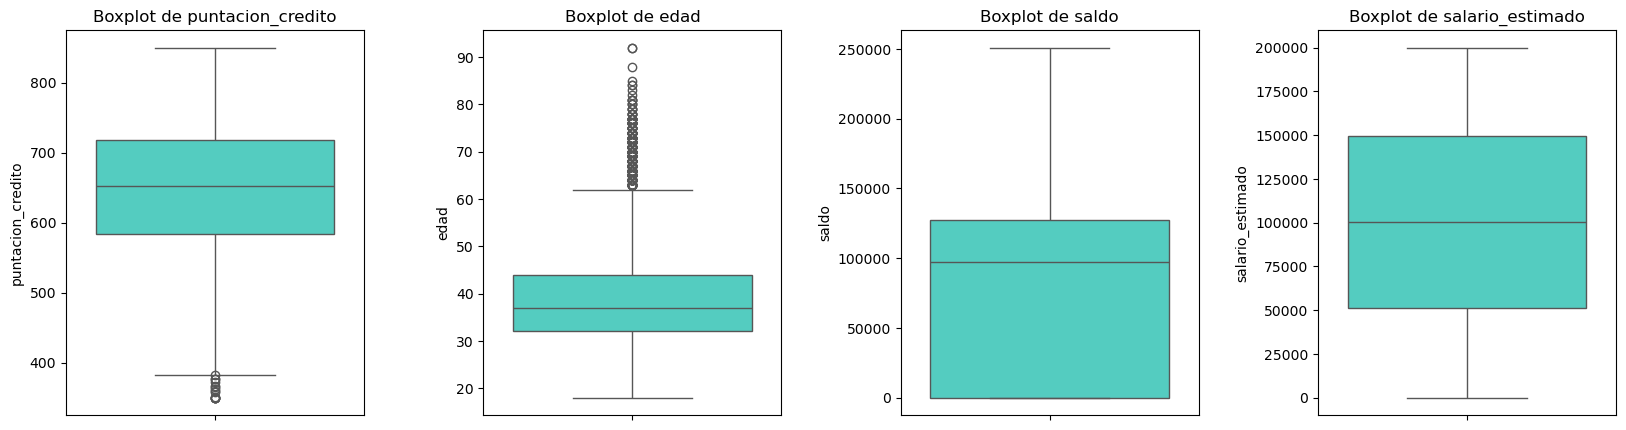

In [17]:
generar_boxplots(df)